# Using LittleVGG for Emotion Detection

### Training Emotion Detector

In [2]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1

In [ ]:
## initializing 

In [3]:
num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 512

train_data_dir = './fer2013/train'
validation_data_dir = './fer2013/validation'

In [4]:


# Let's use some data augmentaiton 
# train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')



Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [13]:
print(validation_generator.class_indices)

{'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}


In [6]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(48,48,1)))
# model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(7, kernel_size=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# # model.add(BatchNormalization())

model.add(Conv2D(7, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Activation("softmax"))

model.summary()
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
__________

## Training our model

In [32]:
# If you want to train the same model or try other models, go for this


filepath = os.path.join("./emotion_detector_models/model_v6_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
callbacks = [checkpoint]
# if mode == "train":
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
nb_train_samples = 28709
nb_validation_samples = 3589
epochs = 150
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            callbacks = callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

# plot_model_history(model_info)
# model.save_weights('model.h5')


Epoch 1/150
56/56 [==============================] - 12s 221ms/step - loss: 1.9706 - acc: 0.1655 - val_loss: 1.9675 - val_acc: 0.1649

Epoch 00001: val_acc improved from -inf to 0.16490, saving model to ./emotion_detector_models/model_v6_1.hdf5
Epoch 2/150
56/56 [==============================] - 12s 212ms/step - loss: 1.9645 - acc: 0.1681 - val_loss: 1.9618 - val_acc: 0.1651

Epoch 00002: val_acc improved from 0.16490 to 0.16510, saving model to ./emotion_detector_models/model_v6_2.hdf5
Epoch 3/150
56/56 [==============================] - 12s 215ms/step - loss: 1.9589 - acc: 0.1685 - val_loss: 1.9562 - val_acc: 0.1654

Epoch 00003: val_acc improved from 0.16510 to 0.16542, saving model to ./emotion_detector_models/model_v6_3.hdf5
Epoch 4/150
56/56 [==============================] - 12s 211ms/step - loss: 1.9535 - acc: 0.1733 - val_loss: 1.9490 - val_acc: 0.1586

Epoch 00004: val_acc did not improve from 0.16542
Epoch 5/150
56/56 [==============================] - 12s 211ms/step - loss

56/56 [==============================] - 12s 218ms/step - loss: 1.7857 - acc: 0.2617 - val_loss: 1.7752 - val_acc: 0.2606

Epoch 00041: val_acc did not improve from 0.27559
Epoch 42/150
56/56 [==============================] - 13s 224ms/step - loss: 1.7880 - acc: 0.2597 - val_loss: 1.7886 - val_acc: 0.2740

Epoch 00042: val_acc did not improve from 0.27559
Epoch 43/150
56/56 [==============================] - 12s 212ms/step - loss: 1.7948 - acc: 0.2546 - val_loss: 1.7796 - val_acc: 0.2808

Epoch 00043: val_acc improved from 0.27559 to 0.28079, saving model to ./emotion_detector_models/model_v6_43.hdf5
Epoch 44/150
56/56 [==============================] - 12s 210ms/step - loss: 1.7861 - acc: 0.2599 - val_loss: 1.7874 - val_acc: 0.2623

Epoch 00044: val_acc did not improve from 0.28079
Epoch 45/150
56/56 [==============================] - 12s 212ms/step - loss: 1.7844 - acc: 0.2655 - val_loss: 1.7842 - val_acc: 0.2788

Epoch 00045: val_acc did not improve from 0.28079
Epoch 46/150
56/56 


Epoch 00126: val_acc did not improve from 0.31102
Epoch 127/150
56/56 [==============================] - 12s 217ms/step - loss: 1.7593 - acc: 0.2766 - val_loss: 1.7290 - val_acc: 0.3094

Epoch 00127: val_acc did not improve from 0.31102
Epoch 128/150
56/56 [==============================] - 12s 209ms/step - loss: 1.7579 - acc: 0.2789 - val_loss: 1.7266 - val_acc: 0.2961

Epoch 00128: val_acc did not improve from 0.31102
Epoch 129/150
56/56 [==============================] - 12s 222ms/step - loss: 1.7570 - acc: 0.2777 - val_loss: 1.7309 - val_acc: 0.3030

Epoch 00129: val_acc did not improve from 0.31102
Epoch 130/150
56/56 [==============================] - 13s 227ms/step - loss: 1.7556 - acc: 0.2766 - val_loss: 1.7230 - val_acc: 0.3048

Epoch 00130: val_acc did not improve from 0.31102
Epoch 131/150
56/56 [==============================] - 12s 207ms/step - loss: 1.7589 - acc: 0.2741 - val_loss: 1.7093 - val_acc: 0.3269

Epoch 00131: val_acc improved from 0.31102 to 0.32694, saving mo

['acc', 'loss', 'val_acc', 'val_loss']


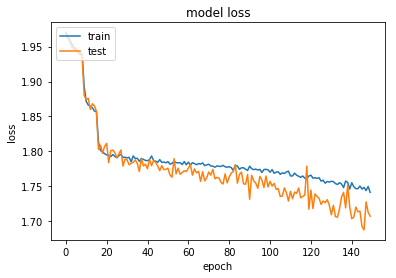

In [33]:
print(model_info.history.keys())

import matplotlib.pyplot as plt
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model.load_weights(os.path.join("./emotion_detector_models/model_v6_146.hdf5"))

IOError: Unable to open file (unable to open file: name = './emotion_detector_models/model_v6_146.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [38]:
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            callbacks = callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)


Epoch 1/150
56/56 [==============================] - 12s 217ms/step - loss: 1.6940 - acc: 0.3181 - val_loss: 1.6746 - val_acc: 0.3504

Epoch 00001: val_acc did not improve from 0.35814
Epoch 2/150
56/56 [==============================] - 12s 213ms/step - loss: 1.6938 - acc: 0.3140 - val_loss: 1.6992 - val_acc: 0.3487

Epoch 00002: val_acc did not improve from 0.35814
Epoch 3/150
56/56 [==============================] - 12s 216ms/step - loss: 1.6910 - acc: 0.3206 - val_loss: 1.6754 - val_acc: 0.3461

Epoch 00003: val_acc did not improve from 0.35814
Epoch 4/150
56/56 [==============================] - 12s 209ms/step - loss: 1.6925 - acc: 0.3170 - val_loss: 1.6515 - val_acc: 0.3516

Epoch 00004: val_acc did not improve from 0.35814
Epoch 5/150
56/56 [==============================] - 12s 212ms/step - loss: 1.6934 - acc: 0.3156 - val_loss: 1.7025 - val_acc: 0.3338

Epoch 00005: val_acc did not improve from 0.35814
Epoch 6/150
56/56 [==============================] - 12s 214ms/step - loss:

KeyboardInterrupt: 

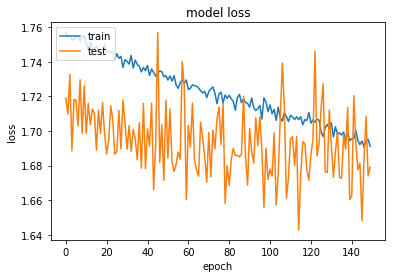

In [36]:
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
model.load_weights(os.path.join("./emotion_detector_models/model_29.hdf5"))
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch = nb_train_samples // batch_size,
#     epochs = epochs,
#     callbacks = callbacks,
#     validation_data = validation_generator,
#     validation_steps = nb_validation_samples // batch_size)

ValueError: You are trying to load a weight file containing 21 layers into a model with 6 layers.

In [16]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Found 28709 images belonging to 7 classes.
# Found 3589 images belonging to 7 classes.


# nb_train_samples = 28273
# nb_validation_samples = 3534
nb_train_samples = 28709
nb_validation_samples = 3589

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

Found 3589 images belonging to 7 classes.
Confusion Matrix
[[331   1  39   8  56  52   4]
 [ 18  30   3   1   1   2   0]
 [ 88   2 243  12  59  94  30]
 [ 28   1  16 754  45  19  16]
 [114   8  79 148 113 105  59]
 [ 56   1  57  16 148 307   9]
 [ 12   0  67  19  18   6 294]]
Classification Report
             precision    recall  f1-score   support

      Angry       0.51      0.67      0.58       491
    Disgust       0.70      0.55      0.61        55
       Fear       0.48      0.46      0.47       528
      Happy       0.79      0.86      0.82       879
    Neutral       0.26      0.18      0.21       626
        Sad       0.52      0.52      0.52       594
   Surprise       0.71      0.71      0.71       416

avg / total       0.56      0.58      0.56      3589



### Loading our saved model

In [17]:
from keras.models import load_model

classifier = load_model('./emotion_detector_models/model_v3_71.hdf5')

### Get our class labels

In [18]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 3589 images belonging to 7 classes.
{0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}


### Let's test on some of validation images

In [ ]:
from keras.models import load_model
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height),grayscale=True), final_path, path_class

# dimensions of our images
img_width, img_height = 48, 48

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = './fer2013/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

/home/impact/venv/py2/local/lib/python2.7/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


### Test on a single image

In [7]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    allfaces = []   
    rects = []
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
        allfaces.append(roi_gray)
        rects.append((x,w,y,h))
    return rects, allfaces, img

img = cv2.imread("rajeev.jpg")
rects, faces, image = face_detector(img)

i = 0
for face in faces:
    roi = face.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

    # make a prediction on the ROI, then lookup the class
    preds = classifier.predict(roi)[0]
    label = class_labels[preds.argmax()]   

    #Overlay our detected emotion on our pic
    label_position = (rects[i][0] + int((rects[i][1]/2)), abs(rects[i][2] - 10))
    i =+ 1
    cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    
cv2.imshow("Emotion Detector", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Let's try this on our webcam


In [14]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

In [16]:
cap.release()
cv2.destroyAllWindows()      